# 0.0 Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn           import metrics      as mt
from sklearn           import tree         as tr
from sklearn           import ensemble     as en
from sklearn           import linear_model as lm
from matplotlib        import pyplot       as plt

# 1.0 Load Data

In [2]:
#test data
x_test = '../projeto/classificacao/X_test.csv'
x_test = pd.read_csv(x_test)

y_test = '../projeto/classificacao/y_test.csv'
y_test = pd.read_csv(y_test).values.ravel()

#training data
x_training = '../projeto/classificacao/x_training.csv'
x_training = pd.read_csv(x_training)

y_training = '../projeto/classificacao/y_training.csv'
y_training = pd.read_csv(y_training).values.ravel()

#validation data
x_validation = '../projeto/classificacao/x_validation.csv'
x_validation = pd.read_csv(x_validation)

y_validation = '../projeto/classificacao/y_validation.csv'
y_validation = pd.read_csv(y_validation).values.ravel()



# 2.0 Algoritmos de Classificação


### 2.1.1 KNN

In [3]:
#seleção de features
x_test
y_test 

In [3]:
#TREINAMENTO
#definição do melhor valor para o parametro (n_neighbors), geralmente depende do objetivo esperado (métricas) , se precisa de mais recall ou precision, ou f1 score, ou acc
for k in range(2, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit( x_training, y_training)    
    y_pred_train = knn_classifier.predict( x_training )    
    
    acc = mt.accuracy_score(y_training , y_pred_train)
    precision = mt.precision_score(y_training, y_pred_train)
    recall = mt.recall_score(y_training, y_pred_train)
    f1 = mt.f1_score(y_training, y_pred_train)
    
        
    print(f'N_NEIGHBORS {k}, com : ACC: {acc:.3f} , PRECISION: {precision:.3f} , RECALL: {recall:.3f} , F1_SCORE: {f1:.3f} com os dados de treinamento')

# O VALOR DE NEIGHBORS ESCOLHIDO NO PROJETO FOI 5, acredito que o motivo foi os valores aproximados de todas as métricas, tendo um equilibrio

N_NEIGHBORS 2, com : ACC: 0.840 , PRECISION: 1.000 , RECALL: 0.631 , F1_SCORE: 0.774 com os dados de treinamento
N_NEIGHBORS 3, com : ACC: 0.832 , PRECISION: 0.812 , RECALL: 0.797 , F1_SCORE: 0.805 com os dados de treinamento
N_NEIGHBORS 4, com : ACC: 0.785 , PRECISION: 0.853 , RECALL: 0.608 , F1_SCORE: 0.710 com os dados de treinamento
N_NEIGHBORS 5, com : ACC: 0.782 , PRECISION: 0.756 , RECALL: 0.733 , F1_SCORE: 0.744 com os dados de treinamento
N_NEIGHBORS 6, com : ACC: 0.757 , PRECISION: 0.792 , RECALL: 0.597 , F1_SCORE: 0.681 com os dados de treinamento
N_NEIGHBORS 7, com : ACC: 0.756 , PRECISION: 0.731 , RECALL: 0.692 , F1_SCORE: 0.711 com os dados de treinamento
N_NEIGHBORS 8, com : ACC: 0.742 , PRECISION: 0.762 , RECALL: 0.588 , F1_SCORE: 0.664 com os dados de treinamento
N_NEIGHBORS 9, com : ACC: 0.740 , PRECISION: 0.714 , RECALL: 0.668 , F1_SCORE: 0.690 com os dados de treinamento
N_NEIGHBORS 10, com : ACC: 0.730 , PRECISION: 0.742 , RECALL: 0.578 , F1_SCORE: 0.650 com os dad

In [8]:
#TESTE
#definição do melhor parametro (n_neighbors)

knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit( x_ttraining, y_test)    
y_pred_test = knn_classifier.predict( x_test )    
    
acc = mt.accuracy_score(y_test , y_pred_test)
precision = mt.precision_score(y_test, y_pred_test)
recall = mt.recall_score(y_test, y_pred_test)
f1 = mt.f1_score(y_test, y_pred_test)
    
        
print(f'N_NEIGHBORS 5 , com : ACC: {acc:.3f} , PRECISION: {precision:.3f} , RECALL: {recall:.3f} , F1_SCORE: {f1:.3f} com os dados de teste')


N_NEIGHBORS 5 , com : ACC: 0.759 , PRECISION: 0.739 , RECALL: 0.699 , F1_SCORE: 0.718 com os dados de teste


In [9]:
#Validation
#definição do melhor parametro (n_neighbors)

knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit( x_training, y_training)    
y_pred_val = knn_classifier.predict( x_validation )    
    
acc = mt.accuracy_score(y_validation , y_pred_val)
precision = mt.precision_score(y_validation, y_pred_val)
recall = mt.recall_score(y_validation, y_pred_val)
f1 = mt.f1_score(y_validation, y_pred_val)
    
        
print(f'N_NEIGHBORS 5, com : ACC: {acc:.3f} , PRECISION: {precision:.3f} , RECALL: {recall:.3f} , F1_SCORE: {f1:.3f} com os dados de validação')

N_NEIGHBORS 5, com : ACC: 0.676 , PRECISION: 0.632 , RECALL: 0.603 , F1_SCORE: 0.617 com os dados de validação


### 2.1.2 Decision Tree

In [10]:
#Training

model_tree = tr.DecisionTreeClassifier(random_state = 0)

model_tree.fit( x_training, y_training)
yhat_training = model_tree.predict_proba(x_training)[:,1]  #É OBRIGADO A SELECIONAR TODAS AS LINHAS APENAS DA SEGUNDA COLUNA


#metrics
acc = mt.accuracy_score(y_training, yhat_training)
precision = mt.precision_score(y_training, yhat_training)
recall = mt.recall_score(y_training, yhat_training)
f1 = mt.f1_score(y_training, yhat_training)

    
print(f' acc:{acc:.3f} , precision:{precision:.3f}, recall:{recall:.3f}, f1-score:{f1:.3f}')



 acc:1.000 , precision:1.000, recall:1.000, f1-score:1.000


In [15]:
#Test

model_tree = tr.DecisionTreeClassifier(random_state = 0)

model_tree.fit( x_training, y_training)
y_pred_test = model_tree.predict_proba(x_test)[:,1]

#metrics
acc = mt.accuracy_score(y_test, y_pred_test)
precision = mt.precision_score(y_test, y_pred_test)
recall = mt.recall_score(y_test, y_pred_test)
f1 = mt.f1_score(y_test, y_pred_test)

    
print(f' acc:{acc:.3f} , precision:{precision:.3f}, recall:{recall:.3f}, f1-score:{f1:.3f}')

 acc:0.946 , precision:0.936, recall:0.940, f1-score:0.938


In [14]:
#Validation

model_tree = tr.DecisionTreeClassifier(random_state = 0)

model_tree.fit( x_training, y_training)
y_pred_val = model_tree.predict_proba(x_validation)[:,1]

#metrics
acc = mt.accuracy_score(y_validation, y_pred_val)
precision = mt.precision_score(y_validation, y_pred_val)
recall = mt.recall_score(y_validation, y_pred_val)
f1 = mt.f1_score(y_validation, y_pred_val)

    
print(f' acc:{acc:.3f} , precision:{precision:.3f}, recall:{recall:.3f}, f1-score:{f1:.3f}')

 acc:0.946 , precision:0.936, recall:0.939, f1-score:0.938


### 2.1.3 Random Forest

In [16]:
#Training

#model definition
model = en.RandomForestClassifier(random_state=0)

#training
model.fit(x_training, y_training)

#performance
yhat_training = model.predict_proba(x_training)[:,1]


Text(0, 0.5, 'TPR')

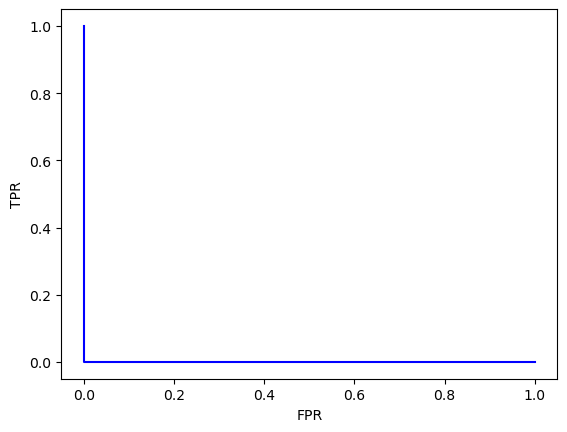

In [17]:
#ROC CURVE
fpr, tpr, th = mt.roc_curve(y_training, yhat_training)

plt.plot( fpr, 1-tpr, color='b')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [18]:
# aqui é separado as classes de acordo com o melhor valor de treshold

distances = np.sqrt((1-tpr)**2 + fpr**2)
best_th = th[np.argmin(distances)] #DEFINE A POSIÇÃO DO MENOR VALOR DE DISTANCE
best_th

0.53

In [19]:
yhat_training = (yhat_training >= best_th).astype(int)

#metrics
acc = mt.accuracy_score(y_training, yhat_training)
precision = mt.precision_score(y_training, yhat_training)
recall = mt.recall_score(y_training, yhat_training)
f1 = mt.f1_score(y_training, yhat_training)

    
print(f' acc:{acc:.3f} , precision:{precision:.3f}, recall:{recall:.3f}, f1-score:{f1:.3f}')

 acc:1.000 , precision:1.000, recall:1.000, f1-score:1.000


 acc:0.963 , precision:0.962, recall:0.955, f1-score:0.958


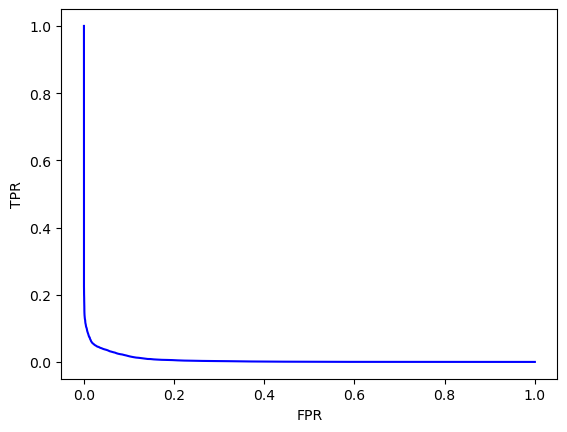

In [20]:
#Test

#model definition
model = en.RandomForestClassifier(random_state=0)

#training
model.fit(x_training, y_training)

#performance
yhat_test = model.predict_proba(x_test)[:,1]


#ROC CURVE
fpr, tpr, th = mt.roc_curve(y_test, yhat_test)

plt.plot( fpr, 1-tpr, color='b')
plt.xlabel('FPR')
plt.ylabel('TPR')

#definir melhor treshold
distances = np.sqrt((1-tpr)**2 + fpr**2)
best_th = th[np.argmin(distances)] #DEFINE A POSIÇÃO DO MENOR VALOR DE DISTANCE
best_th

#tranformas os valores em int para poder prosseguir com a analise
yhat_test = (yhat_test >= best_th).astype(int)


#metrics
acc = mt.accuracy_score(y_test, yhat_test)
precision = mt.precision_score(y_test, yhat_test)
recall = mt.recall_score(y_test, yhat_test)
f1 = mt.f1_score(y_test, yhat_test)

    
print(f' acc:{acc:.3f} , precision:{precision:.3f}, recall:{recall:.3f}, f1-score:{f1:.3f}')

 acc:0.962 , precision:0.955, recall:0.957, f1-score:0.956


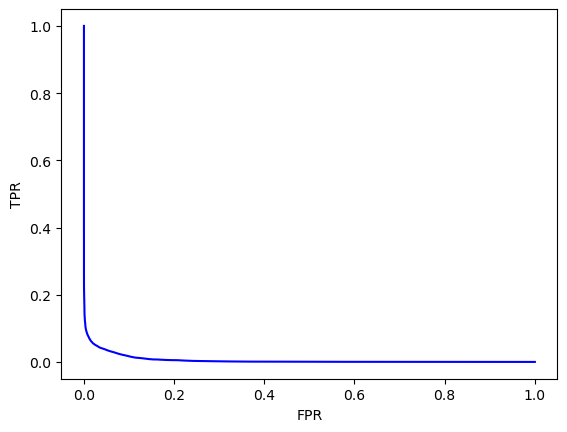

In [74]:
#Validation

#model definition
model = en.RandomForestClassifier(random_state=0)

#training
model.fit(x_training, y_training)

#performance
yhat_val = model.predict_proba(x_validation)[:,1]


#ROC CURVE
fpr, tpr, th = mt.roc_curve(y_validation, yhat_val)

plt.plot( fpr, 1-tpr, color='b')
plt.xlabel('FPR')
plt.ylabel('TPR')


#definir melhor TH
distances = np.sqrt((1-tpr)**2 + fpr**2) #equação da reta
best_th = th[np.argmin(distances)] #DEFINE A POSIÇÃO DO MENOR VALOR DE DISTANCE NOS VALORES DE TRESHOLD(TH)
best_th

#transformar os valores em INT para prosseguir
yhat_val = (yhat_val >= best_th).astype(int)


#metrics
acc = mt.accuracy_score(y_validation, yhat_val)
precision = mt.precision_score(y_validation, yhat_val)
recall = mt.recall_score(y_validation, yhat_val)
f1 = mt.f1_score(y_validation, yhat_val)

    
print(f' acc:{acc:.3f} , precision:{precision:.3f}, recall:{recall:.3f}, f1-score:{f1:.3f}')

### 2.1.4 Logistic Regression 

In [29]:
#TRAINING

#Define
model = lm.LogisticRegression(random_state = 0)

#training
model.fit(x_training, y_training)

#performance
yhat_training = model.predict(x_training)

acc = mt.accuracy_score(y_training , yhat_training)
precision = mt.precision_score(y_training, yhat_training)
recall = mt.recall_score(y_training, yhat_training)
f1 = mt.f1_score(y_training, yhat_training)

print(f' ACC: {acc:.3f} , PRECISION: {precision:.3f} , RECALL: {recall:.3f} , F1-SCORE: {f1:.3f}')

 ACC: 0.567 , PRECISION: 0.000 , RECALL: 0.000 , F1-SCORE: 0.000


C:\Users\donoex\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
#TESTE

#Define
model = lm.LogisticRegression(random_state = 0)

#training
model.fit(x_training, y_training)

#performance
yhat_test = model.predict(x_test)

acc = mt.accuracy_score(y_test , yhat_test)
precision = mt.precision_score(y_test, yhat_test)
recall = mt.recall_score(y_test, yhat_test)
f1 = mt.f1_score(y_test, yhat_test)

print(f' ACC: {acc:.3f} , PRECISION: {precision:.3f} , RECALL: {recall:.3f} , F1-SCORE: {f1:.3f}')

 ACC: 0.561 , PRECISION: 0.000 , RECALL: 0.000 , F1-SCORE: 0.000


C:\Users\donoex\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#VALIDATION

#Define
model = lm.LogisticRegression(random_state = 0)

#training
model.fit(x_training, y_training)

#performance
yhat_val = model.predict(x_validation)

acc = mt.accuracy_score(y_validation , yhat_val)
precision = mt.precision_score(y_validation, yhat_val)
recall = mt.recall_score(y_validation, yhat_val)
f1 = mt.f1_score(y_validation, yhat_val)

print(f' ACC: {acc:.3f} , PRECISION: {precision:.3f} , RECALL: {recall:.3f} , F1-SCORE: {f1:.3f}')

 ACC: 0.567 , PRECISION: 0.000 , RECALL: 0.000 , F1-SCORE: 0.000


C:\Users\donoex\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
